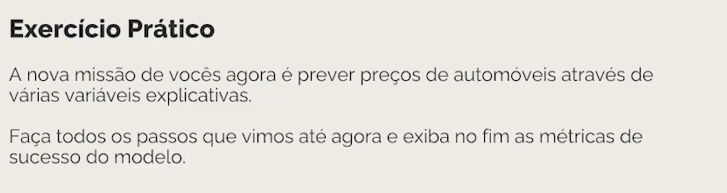

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#Importe o arquivo formato xlsx
df = pd.read_csv(r"C:\Users\alexa\OneDrive\Área de Trabalho\repositorios_git\DNC_repository\regressao_linear_multipla_scikit-learn\car_price_assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#CarName
le.fit(df.CarName) 
df.CarName = le.transform(df.CarName)

# fueltype
le.fit(df.fueltype) 
df.fueltype = le.transform(df.fueltype)

#aspiration
le.fit(df.aspiration) 
df.aspiration = le.transform(df.aspiration)

#doornumber
le.fit(df.doornumber) 
df.doornumber = le.transform(df.doornumber)

#carbody
le.fit(df.carbody) 
df.carbody = le.transform(df.carbody)

#regiao
le.fit(df.drivewheel) 
df.drivewheel = le.transform(df.drivewheel)

#regiao
le.fit(df.enginelocation) 
df.enginelocation = le.transform(df.enginelocation)

#regiao
le.fit(df.fuelsystem) 
df.fuelsystem = le.transform(df.fuelsystem)

#regiao
le.fit(df.enginetype) 
df.enginetype = le.transform(df.enginetype)

#regiao
le.fit(df.cylindernumber) 
df.cylindernumber = le.transform(df.cylindernumber)

<AxesSubplot:xlabel='price', ylabel='Count'>

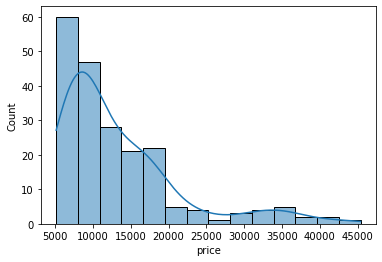

In [15]:
sns.histplot(df, x="price", kde=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [17]:

df_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [19]:
df_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.723622,1.743470,-1.838221,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,-1.706724,1.743470,-1.813780,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,-1.689826,0.133509,-1.862662,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,...,0.604046,0.869568,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,-1.672928,0.938490,-1.789339,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,...,-0.431076,0.869568,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,-1.656029,0.938490,-1.764897,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,...,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668


<AxesSubplot:xlabel='price', ylabel='Count'>

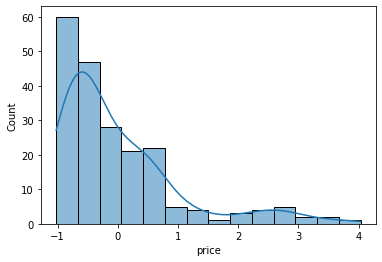

In [20]:
sns.histplot(df_norm, x="price", kde=True)

In [21]:
df_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-4.549207e-17,5.848980e-17,-7.148753e-17,-2.147334e-16,-4.332578e-18,2.177120e-16,-1.749278e-16,-1.039819e-16,6.146845e-17,-1.496906e-15,...,5.415722e-19,3.119456e-16,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,6.553024e-17,1.104807e-16,1.743863e-16,1.581391e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-1.723622e+00,-2.281433e+00,-1.887104e+00,-3.041381e+00,-4.692953e-01,-8.846517e-01,-3.050975e+00,-2.391492e+00,-1.218667e-01,-2.023713e+00,...,-1.586561e+00,-1.620116e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00,-1.023762e+00
25%,-8.618111e-01,-6.714717e-01,-8.116882e-01,3.287980e-01,-4.692953e-01,-8.846517e-01,-7.172069e-01,-5.890807e-01,-1.218667e-01,-7.085959e-01,...,-7.199469e-01,-1.122179e+00,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,-6.832865e-01,-9.530117e-01,-8.371954e-01,-6.887281e-01
50%,0.000000e+00,1.335090e-01,6.819707e-02,3.287980e-01,-4.692953e-01,-8.846517e-01,4.496773e-01,-5.890807e-01,-1.218667e-01,-2.924196e-01,...,-1.662771e-01,8.695675e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,1.573661e-01,-1.868650e-01,-1.093538e-01,-3.741476e-01
75%,8.618111e-01,9.384897e-01,9.236411e-01,3.287980e-01,-4.692953e-01,1.130388e+00,4.496773e-01,1.213330e+00,-1.218667e-01,6.065210e-01,...,3.392475e-01,8.695675e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,7.878555e-01,7.325109e-01,4.729195e-01,4.048375e-01
max,1.723622e+00,1.743470e+00,1.681320e+00,3.287980e-01,2.130854e+00,1.130388e+00,1.616562e+00,1.213330e+00,8.205689e+00,3.686225e+00,...,4.792679e+00,1.865441e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,3.099650e+00,3.643868e+00,3.384286e+00,4.030858e+00


In [22]:
df_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-4.549207e-17,5.848980e-17,-7.148753e-17,-2.147334e-16,-4.332578e-18,2.177120e-16,-1.749278e-16,-1.039819e-16,6.146845e-17,-1.496906e-15,...,5.415722e-19,3.119456e-16,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,6.553024e-17,1.104807e-16,1.743863e-16,1.581391e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-1.723622e+00,-2.281433e+00,-1.887104e+00,-3.041381e+00,-4.692953e-01,-8.846517e-01,-3.050975e+00,-2.391492e+00,-1.218667e-01,-2.023713e+00,...,-1.586561e+00,-1.620116e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00,-1.023762e+00
25%,-8.618111e-01,-6.714717e-01,-8.116882e-01,3.287980e-01,-4.692953e-01,-8.846517e-01,-7.172069e-01,-5.890807e-01,-1.218667e-01,-7.085959e-01,...,-7.199469e-01,-1.122179e+00,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,-6.832865e-01,-9.530117e-01,-8.371954e-01,-6.887281e-01
50%,0.000000e+00,1.335090e-01,6.819707e-02,3.287980e-01,-4.692953e-01,-8.846517e-01,4.496773e-01,-5.890807e-01,-1.218667e-01,-2.924196e-01,...,-1.662771e-01,8.695675e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,1.573661e-01,-1.868650e-01,-1.093538e-01,-3.741476e-01
75%,8.618111e-01,9.384897e-01,9.236411e-01,3.287980e-01,-4.692953e-01,1.130388e+00,4.496773e-01,1.213330e+00,-1.218667e-01,6.065210e-01,...,3.392475e-01,8.695675e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,7.878555e-01,7.325109e-01,4.729195e-01,4.048375e-01
max,1.723622e+00,1.743470e+00,1.681320e+00,3.287980e-01,2.130854e+00,1.130388e+00,1.616562e+00,1.213330e+00,8.205689e+00,3.686225e+00,...,4.792679e+00,1.865441e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,3.099650e+00,3.643868e+00,3.384286e+00,4.030858e+00


In [23]:
import statsmodels.formula.api as smf

In [36]:
#modelo MRLS
function = 'price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     64.23
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           5.48e-76
Time:                        21:21:21   Log-Likelihood:                -55.175
No. Observations:                 205   AIC:                             162.4
Df Residuals:                     179   BIC:                             248.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.767e-16      0.024  

In [37]:
#modelo MRLS
function = 'price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     67.27
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           6.62e-77
Time:                        21:21:44   Log-Likelihood:                -55.178
No. Observations:                 205   AIC:                             160.4
Df Residuals:                     180   BIC:                             243.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.921e-16      0.024   8.14e

In [38]:
#modelo MRLS
function = 'price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     70.56
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           8.00e-78
Time:                        21:22:30   Log-Likelihood:                -55.211
No. Observations:                 205   AIC:                             158.4
Df Residuals:                     181   BIC:                             238.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.921e-16      0.024   8.16e

In [39]:
#modelo MRLS
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     74.10
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           9.97e-79
Time:                        21:23:05   Log-Likelihood:                -55.307
No. Observations:                 205   AIC:                             156.6
Df Residuals:                     182   BIC:                             233.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.921e-16      0.023   8.18e

In [40]:
#modelo MRLS
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     78.00
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.18e-79
Time:                        21:23:42   Log-Likelihood:                -55.373
No. Observations:                 205   AIC:                             154.7
Df Residuals:                     183   BIC:                             227.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.921e-16      0.023    8.2e

In [41]:
#modelo MRLS
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     82.24
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.42e-80
Time:                        21:24:05   Log-Likelihood:                -55.492
No. Observations:                 205   AIC:                             153.0
Df Residuals:                     184   BIC:                             222.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.921e-16      0.023   8.22e

In [42]:
#modelo MRLS
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+highwaympg'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     86.78
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.93e-81
Time:                        21:24:31   Log-Likelihood:                -55.769
No. Observations:                 205   AIC:                             151.5
Df Residuals:                     185   BIC:                             218.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.921e-16      0.023   8.23e

In [43]:
#modelo MRLS
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+highwaympg'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     91.86
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           2.44e-82
Time:                        21:25:01   Log-Likelihood:                -56.003
No. Observations:                 205   AIC:                             150.0
Df Residuals:                     186   BIC:                             213.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.921e-16      0.023   8.24e

In [44]:
#modelo MRLS
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm-1'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              97.84
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                    1.19e-83
Time:                        21:25:33   Log-Likelihood:                         -56.443
No. Observations:                 205   AIC:                                      146.9
Df Residuals:                     188   BIC:                                      203.4
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [45]:
#modelo MRLS
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm-1'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              104.1
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                    1.66e-84
Time:                        21:25:59   Log-Likelihood:                         -56.845
No. Observations:                 205   AIC:                                      145.7
Df Residuals:                     189   BIC:                                      198.9
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [46]:
#modelo MRLS
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+cylindernumber+enginesize+stroke+horsepower+peakrpm-1'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              111.0
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                    2.32e-85
Time:                        21:26:30   Log-Likelihood:                         -57.290
No. Observations:                 205   AIC:                                      144.6
Df Residuals:                     190   BIC:                                      194.4
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [47]:
#modelo MRLS
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+horsepower+peakrpm-1'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              118.5
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                    4.65e-86
Time:                        21:26:53   Log-Likelihood:                         -58.160
No. Observations:                 205   AIC:                                      144.3
Df Residuals:                     191   BIC:                                      190.8
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [48]:
#modelo MRLS
function = 'price~CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+horsepower+peakrpm-1'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              126.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                    1.06e-86
Time:                        21:27:32   Log-Likelihood:                         -59.199
No. Observations:                 205   AIC:                                      144.4
Df Residuals:                     192   BIC:                                      187.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [49]:
#modelo MRLS
function = 'price~CarName+fueltype+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+horsepower+peakrpm-1'
model = smf.ols(formula=function, data=df_norm).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              136.5
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                    2.45e-87
Time:                        21:27:59   Log-Likelihood:                         -60.295
No. Observations:                 205   AIC:                                      144.6
Df Residuals:                     193   BIC:                                      184.5
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [50]:
x = df_norm[['CarName', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'horsepower', 'peakrpm']]

y = df_norm[["price"]]

In [51]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.8904191317778808


In [53]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.2306175901978669
MSE: 0.08700715775766647
RMSE: 0.2949697573611004


In [54]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3196376569560533
MSE: 0.19987571007993
RMSE: 0.44707461354893546
